## K-means clustering to analyse housing data

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Data

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [7]:
table1=housing[['longitude', 'latitude']]
table1.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [8]:
table1=table1.values
type(table1)

numpy.ndarray

In [9]:
table1.shape

(20640, 2)

In [10]:
i=1; j=0
table1[i,j]

-122.22

In [11]:
table1[0,:]

array([-122.23,   37.88])

In [12]:
table1[:,0]

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

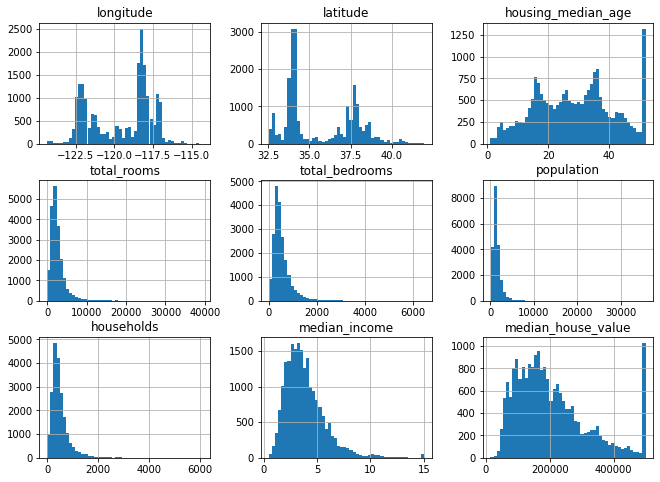

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(11,8))
plt.show()

<AxesSubplot:>

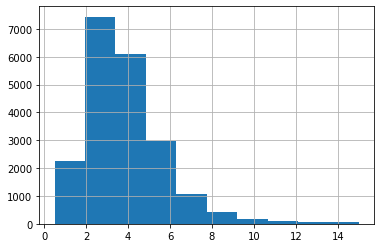

In [14]:
housing["median_income"].hist()

### Visualize the data 

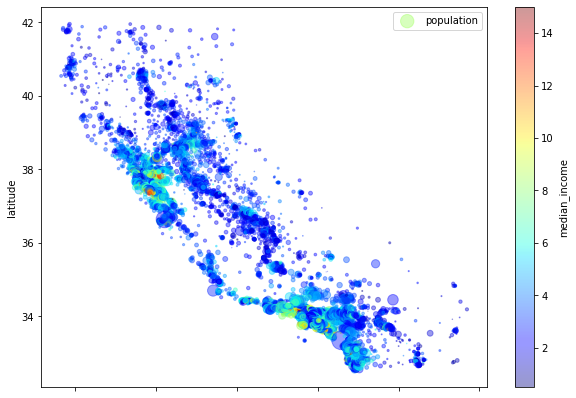

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, 
    label="population",
    c="median_income", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()

### Visualise data on top of map of Cali

Text(0.5, 0, 'Longitude')

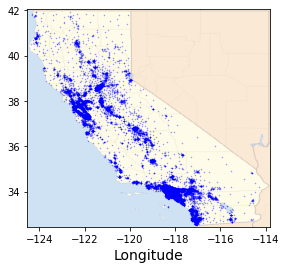

In [16]:
california_img=imread('california.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.scatter(x=housing['longitude'], y=housing['latitude'], 
            color='b',  marker='.', s=1, alpha=0.4)
plt.xlabel("Longitude", fontsize=14)

## Make ocean proximity a binary variable

In [17]:
housing=pd.get_dummies(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## 1. cluster data  based on location
## 2. cluster data points to find out where high/low income people live

In [18]:
data1=housing[['longitude','latitude','ocean_proximity_<1H OCEAN',
            'ocean_proximity_INLAND','ocean_proximity_ISLAND',
            'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']]
data1.head()

,longitude,latitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0,0,0,1,0
1,-122.22,37.86,0,0,0,1,0
2,-122.24,37.85,0,0,0,1,0
3,-122.25,37.85,0,0,0,1,0
4,-122.25,37.85,0,0,0,1,0


In [19]:
data1_array=data1.values
type(data1_array)

numpy.ndarray

In [20]:
scaler = MinMaxScaler()
data1n=scaler.fit_transform(data1_array, y=None)

In [21]:
data1n.shape

(20640, 7)

In [22]:
data1n

array([[0.21115538, 0.5674814 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21215139, 0.565356  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21015936, 0.5642933 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30179283, 0.73219979, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30976096, 0.72582359, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=0)
model.fit(data1n)
label1=model.predict(data1n) 

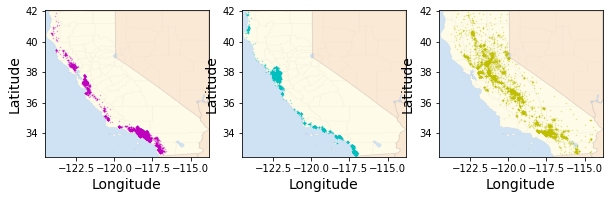

In [25]:
color=['m', 'c', 'y']
fig, ax = plt.subplots(1,3, figsize=(10,6))
for k in range(0, 3):
    ax[k].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    ax[k].scatter(x=data1_array[label1==k,0], y=data1_array[label1==k,1], 
                 color=color[k],  marker='.', s=1, alpha=0.4)
    ax[k].set_ylabel("Latitude", fontsize=14)
    ax[k].set_xlabel("Longitude", fontsize=14)


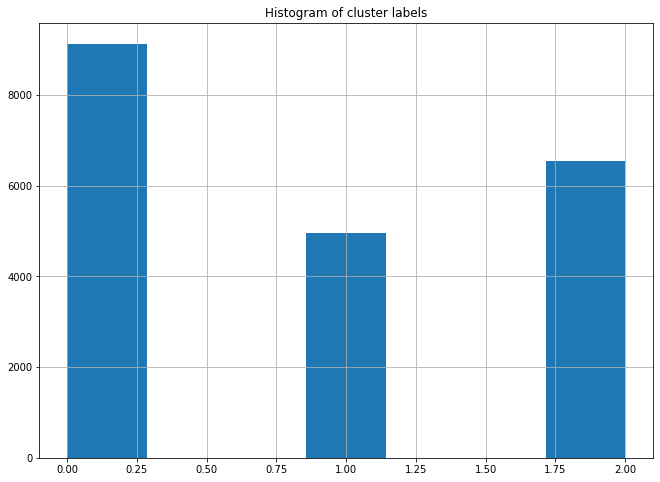

In [26]:
df = pd.DataFrame(label1)
df.hist(bins=7, figsize=(11,8))
plt.title("Histogram of cluster labels")
plt.show()

### 2. cluster data to find out where high/low income people live

In [175]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [176]:
data2=housing[['latitude','longitude','median_income']].copy()
data2.head()

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [177]:
data2_array=data2.values

In [178]:
data2n=scaler.fit_transform(data2_array, y=None)
data2n[:5]

array([[0.5674814 , 0.21115538, 0.53966842],
       [0.565356  , 0.21215139, 0.53802706],
       [0.5642933 , 0.21015936, 0.46602805],
       [0.5642933 , 0.20916335, 0.35469856],
       [0.5642933 , 0.20916335, 0.23077613]])

In [179]:
model=KMeans(n_clusters=6)
model=model.fit(data2n)
model

KMeans(n_clusters=6)

In [180]:
label2=model.fit_predict(data2n) 
centers = model.cluster_centers_
centers[:5]
centers.shape

(6, 3)

In [181]:
data2['labels'] = model.fit_predict(data2n)
data2['labels'] = data2['labels'].astype("category")
data2

,latitude,longitude,median_income,labels
0,37.88,-122.23,8.3252,0
1,37.86,-122.22,8.3014,0
2,37.85,-122.24,7.2574,0
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,3
...,...,...,...,...
20635,39.48,-121.09,1.5603,5
20636,39.49,-121.21,2.5568,5
20637,39.43,-121.22,1.7000,5
20638,39.43,-121.32,1.8672,5


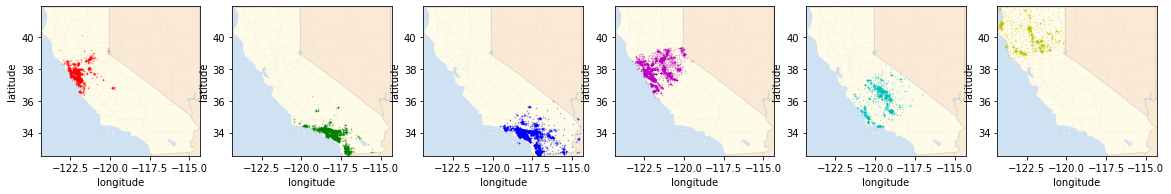

In [182]:
color=['r','g','b','m', 'c', 'y']
fig, ax = plt.subplots(1,6, figsize=(20,6))
for k in range(0, 6):
    data2_k=data2.loc[data2['labels'] == k]
    ax[k].imshow(california_img, extent=[housing['longitude'].min(),housing['longitude'].max(),housing['latitude'].min(),housing['latitude'].max()], alpha=0.5)
    ax[k].scatter(x=data2_k['longitude'], y=data2_k['latitude'], 
                 color=color[k],  marker='.', s=1, alpha=0.4)
    ax[k].set_ylabel("latitude", fontsize=10)
    ax[k].set_xlabel("longitude", fontsize=10)

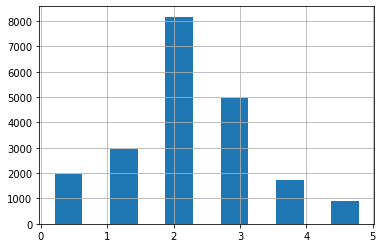

In [183]:
df2=data2['labels']
hist = df2.hist(bins=6,rwidth=0.5)

In [185]:
mim=[]
for k in range (0,6):
    data2_k=data2.loc[data2['labels'] == k]
    mi_data=data2_k['median_income']
    mi_data_array=mi_data.values
    mi_mean=mi_data_array.mean()
    mim.append(mi_mean)
mim

[6.417955156723964,
 6.502362975543479,
 3.1055460907867367,
 3.1902766120881343,
 2.7859818713450295,
 2.3930427927927926]

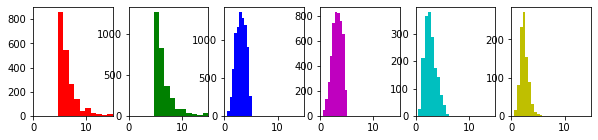

In [186]:
color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,6, figsize=(10,2))
for k in range (0,6):
    data2_k=data2.loc[data2['labels'] == k]
    mi_data=data2_k['median_income']
    ax[k].hist(x=mi_data, color=color[k], bins=10)
    ax[k].set_xlim(0, 15)

we can clearly see some clusters of high-income people

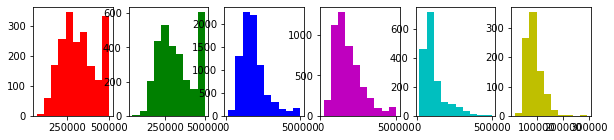

In [187]:
mhv_df=housing['median_house_value']
data2_update=data2.join(mhv_df)
color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,6, figsize=(10,2))
for k in range (0,6):
    data2_update_k=data2_update.loc[data2_update['labels'] == k]
    mhv_data=data2_update_k['median_house_value']
    ax[k].hist(x=mhv_data, color=color[k], bins=10)  

## 3. Run kmeans several times to see if result is stable for task 2

### When running KMeans several times without random_state=0, data in each respective cluster appears to be stable.
#### The way the cluster centers are labeled can differ

Trial: 0


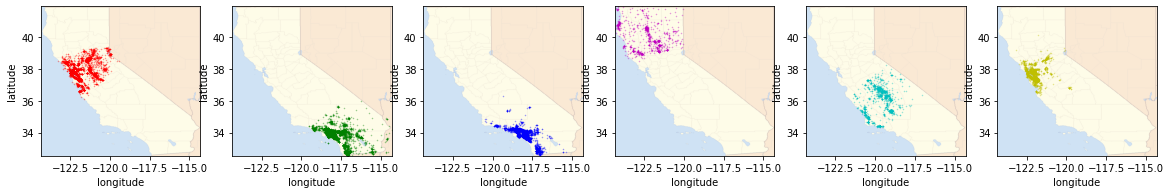

Trial: 1


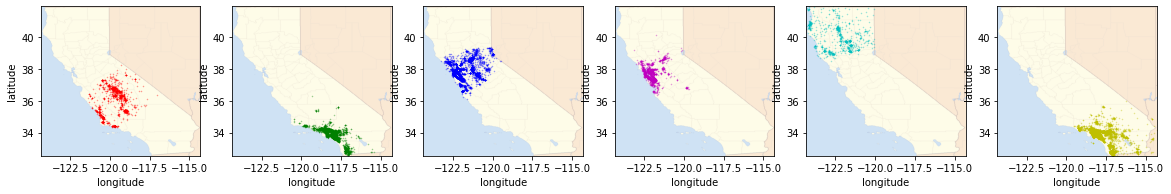

Trial: 2


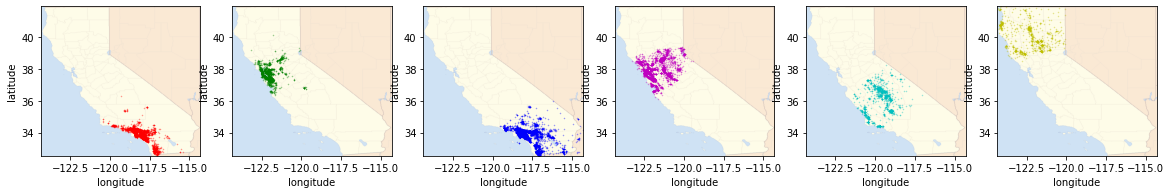

Trial: 3


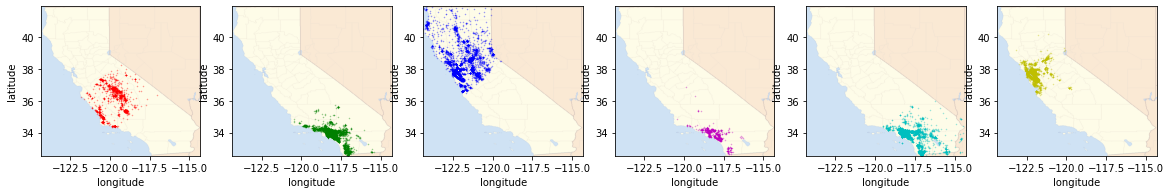

Trial: 4


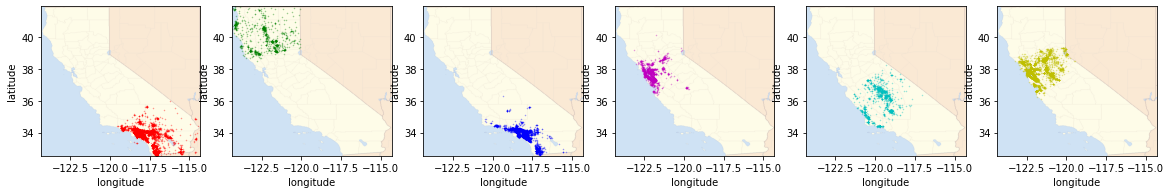

Trial: 5


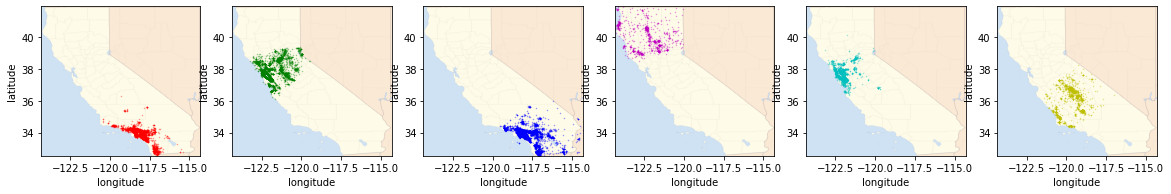

Trial: 6


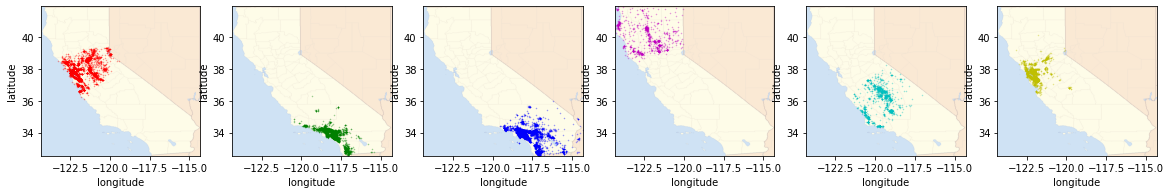

Trial: 7


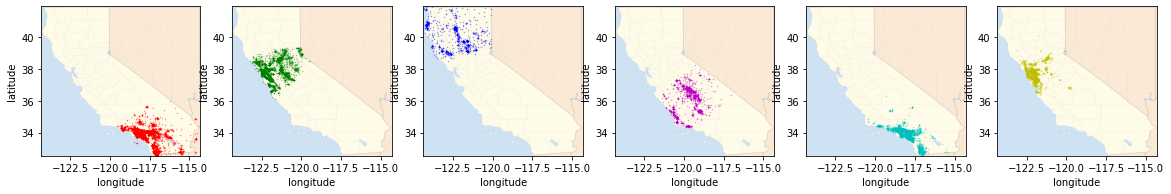

Trial: 8


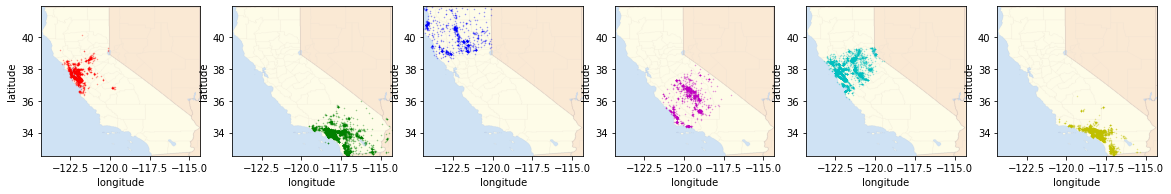

Trial: 9


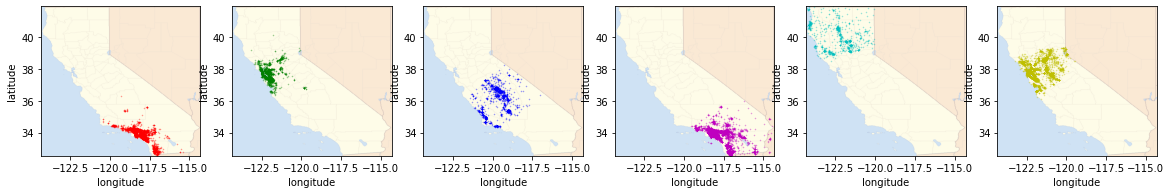

In [188]:
housing = pd.read_csv("housing.csv")
for trial in range (0,10):
    data3=housing[['latitude','longitude','median_income']].copy()

    data3_array=data3.values

    data3n=scaler.fit_transform(data3_array, y=None)

    model=KMeans(n_clusters=6)
    model=model.fit(data3n)

    data3['labels'] = model.fit_predict(data3n)
    data3['labels'] = data3['labels'].astype("category")

    color=['r','g','b','m', 'c', 'y']
    fig, ax = plt.subplots(1,6, figsize=(20,6))
    for k in range(0, 6):
        data3_k=data3.loc[data3['labels'] == k]
        ax[k].imshow(california_img, extent=[housing['longitude'].min(),housing['longitude'].max(),housing['latitude'].min(),housing['latitude'].max()], alpha=0.5)
        ax[k].scatter(x=data3_k['longitude'], y=data3_k['latitude'], 
                     color=color[k],  marker='.', s=1, alpha=0.4)
        ax[k].set_ylabel("latitude", fontsize=10)
        ax[k].set_xlabel("longitude", fontsize=10)
    print('Trial:',trial)
    plt.show()
    trial=trial+1


# Clustering based on latitude, longitude, median income, median house value, and ocean proximity

Trial: 0


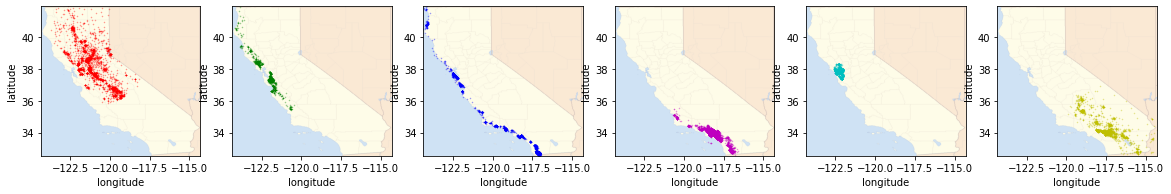

Median income hist


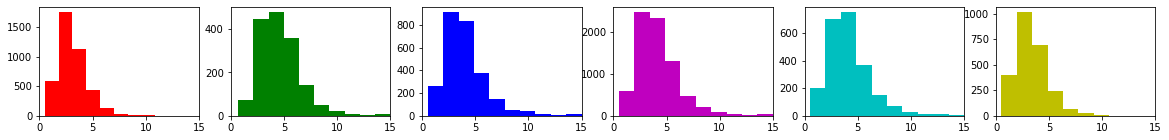

Median house value hist


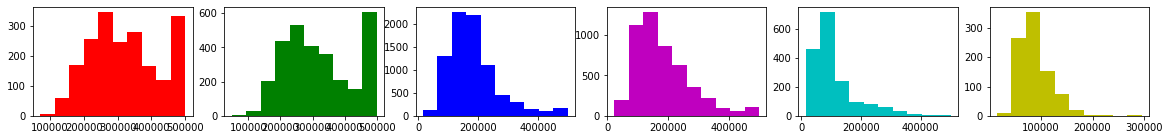

Trial: 1


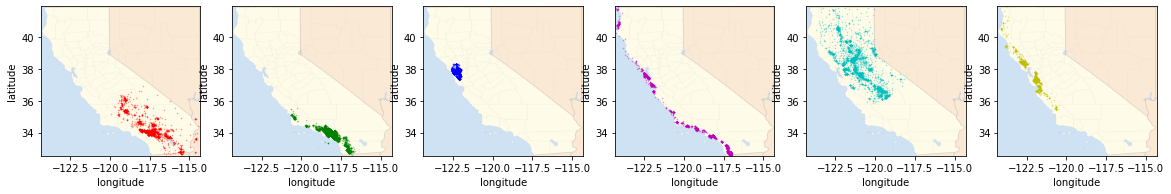

Median income hist


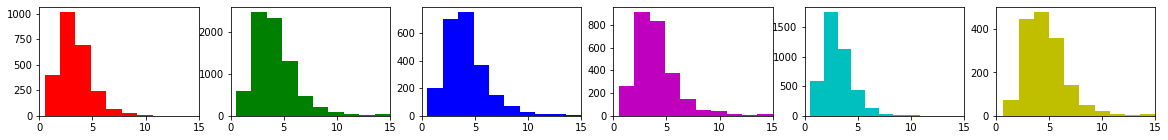

Median house value hist


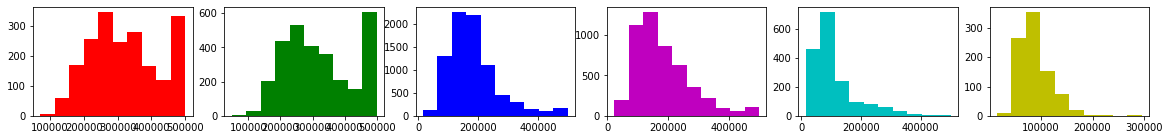

Trial: 2


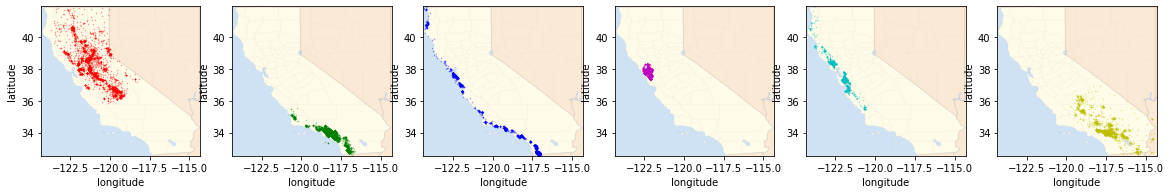

Median income hist


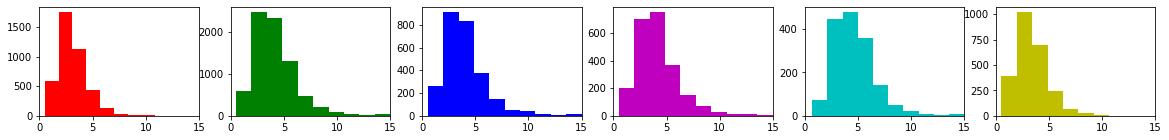

Median house value hist


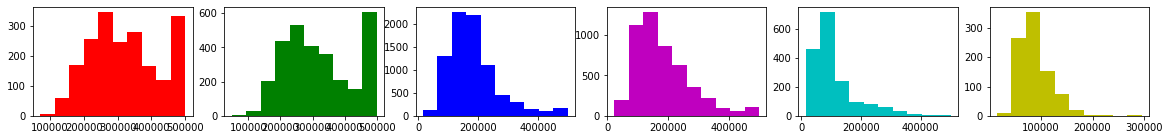

Trial: 3


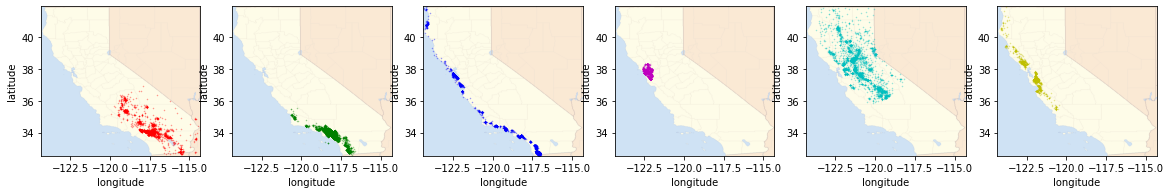

Median income hist


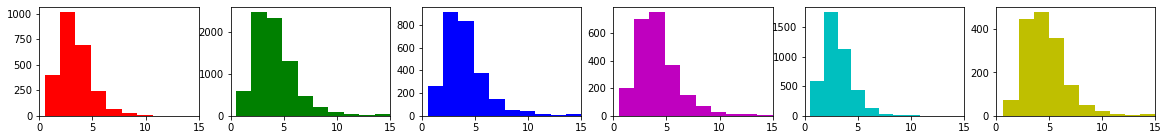

Median house value hist


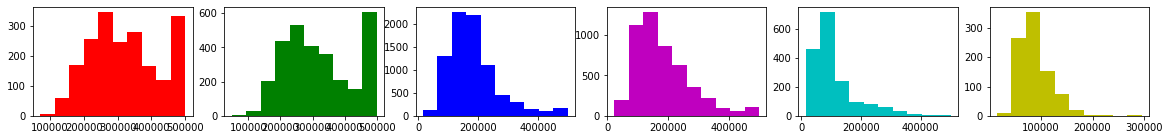

Trial: 4


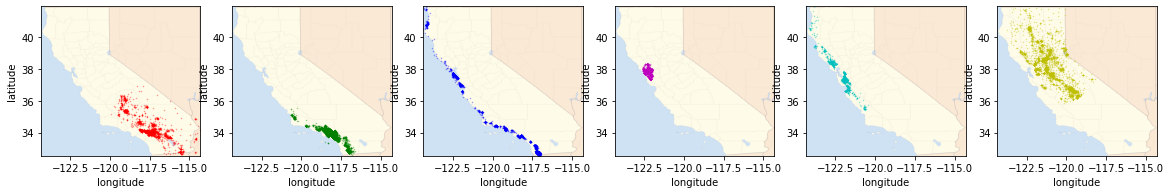

Median income hist


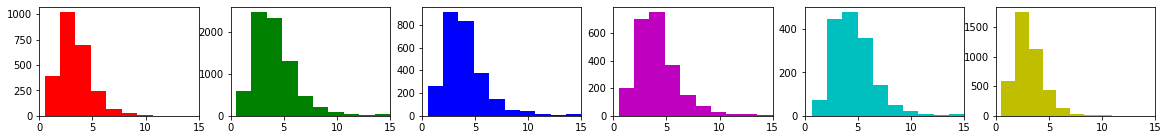

Median house value hist


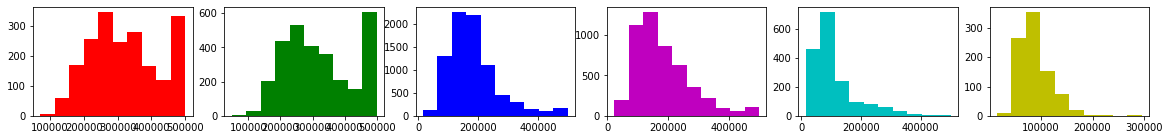

Trial: 5


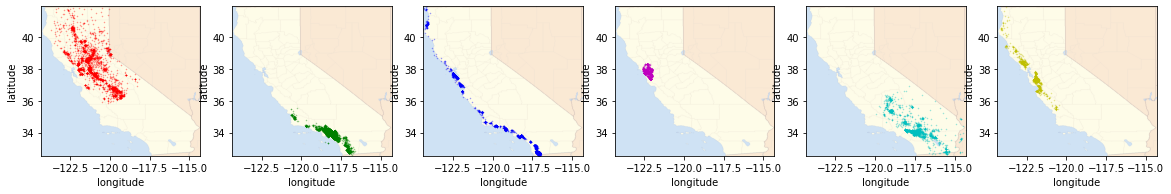

Median income hist


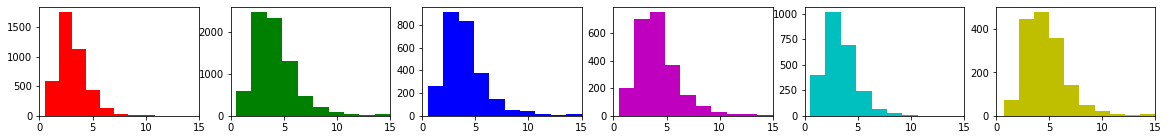

Median house value hist


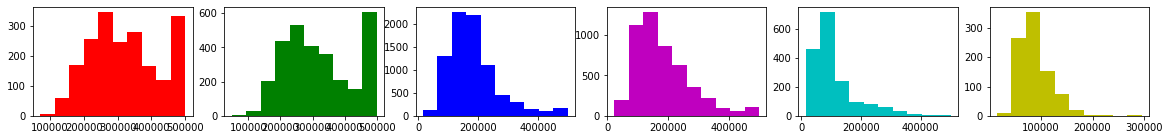

Trial: 6


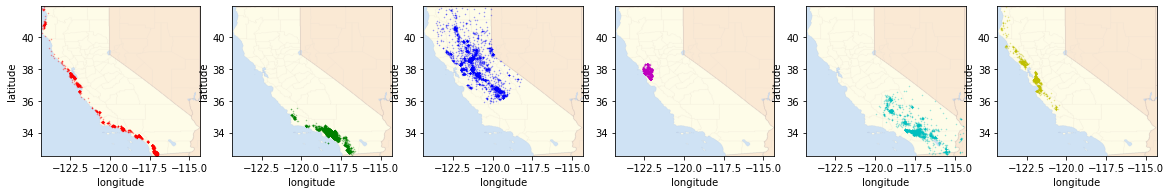

Median income hist


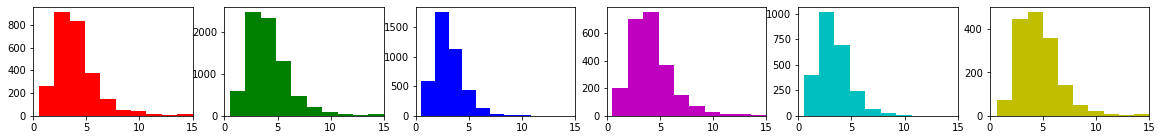

Median house value hist


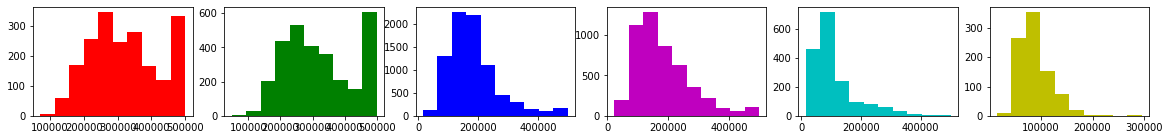

Trial: 7


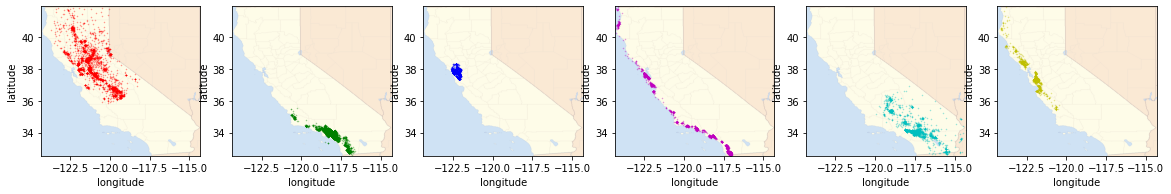

Median income hist


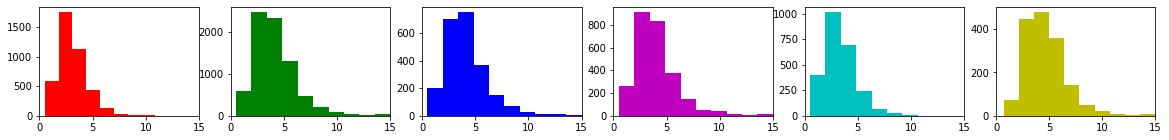

Median house value hist


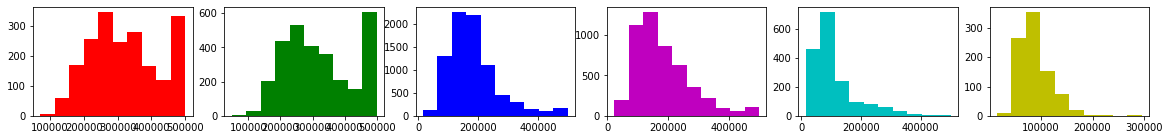

Trial: 8


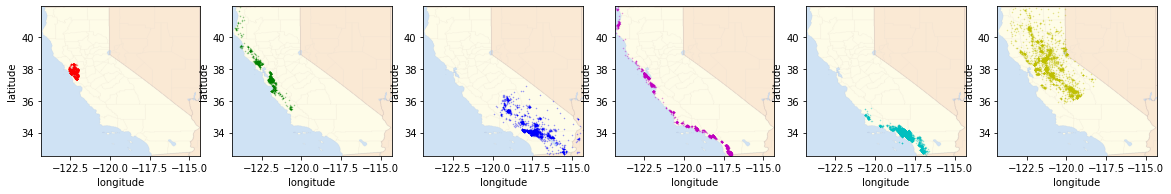

Median income hist


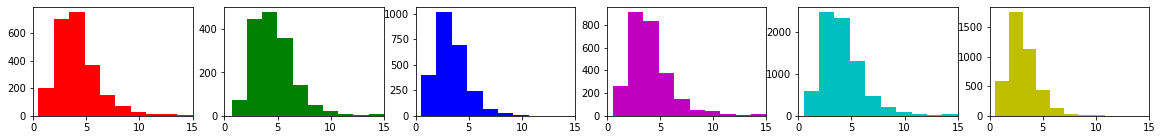

Median house value hist


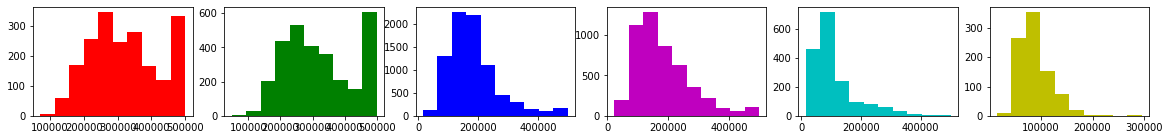

Trial: 9


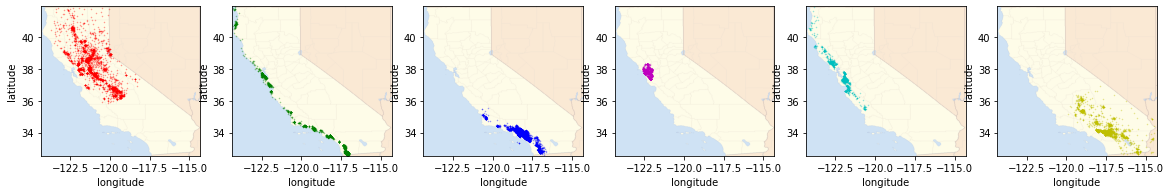

Median income hist


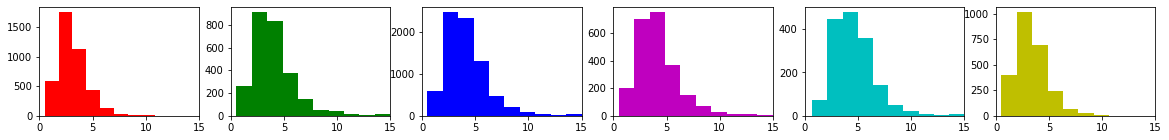

Median house value hist


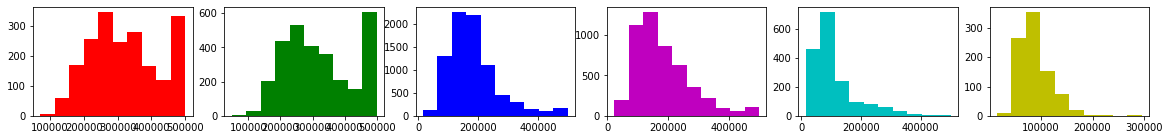

In [189]:
housing=pd.get_dummies(housing)
for trial in range (0,10):
    data4=housing[['latitude','longitude','median_income','median_house_value',
                   'ocean_proximity_<1H OCEAN','ocean_proximity_INLAND',
                  'ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']].copy()

    data4_array=data4.values

    data4n=scaler.fit_transform(data4_array, y=None)

    model=KMeans(n_clusters=6)
    model=model.fit(data4n)

    data4['labels'] = model.fit_predict(data4n)
    data4['labels'] = data4['labels'].astype("category")

    color=['r','g','b','m', 'c', 'y']
    fig, ax = plt.subplots(1,6, figsize=(20,6))
    for k in range(0, 6):
        data4_k=data4.loc[data4['labels'] == k]
        ax[k].imshow(california_img, extent=[housing['longitude'].min(),housing['longitude'].max(),housing['latitude'].min(),housing['latitude'].max()], alpha=0.5)
        ax[k].scatter(x=data4_k['longitude'], y=data4_k['latitude'], 
                     color=color[k],  marker='.', s=1, alpha=0.4)
        ax[k].set_ylabel("latitude", fontsize=10)
        ax[k].set_xlabel("longitude", fontsize=10)
    print('Trial:',trial)
    plt.show()
    fig, ax = plt.subplots(1,6, figsize=(20,2))
    for k in range (0,6):
        data4_k=data4.loc[data4['labels'] == k]
        mi_data=data4_k['median_income']
        ax[k].hist(x=mi_data, color=color[k], bins=10)
        ax[k].set_xlim(0, 15)
    print('Median income hist')
    plt.show()
    fig, ax = plt.subplots(1,6, figsize=(20,2))
    for k in range (0,6):
        data2_update_k=data2_update.loc[data2_update['labels'] == k]
        mhv_data=data2_update_k['median_house_value']
        ax[k].hist(x=mhv_data, color=color[k], bins=10)
    print('Median house value hist')
    plt.show()
    trial=trial+1
